# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

Firstly the parameters are stored in a dict. Secound the utility function is defined. Next the solution is solved for consumption, housing quality and utility.

In [2]:
from scipy import optimize

# dictionary of exogenous variables
param_dict = {'phi'  : 0.3,
              'eps'  : 0.5,
              'r'    : 0.03,
              'tau_g': 0.012,
              'tau_p': 0.004,
              'p_bar': 3,
             }
#money on hand
m=0.5

#utility function
def utility_function(c, h, param_dict):
    return (c**(1-param_dict['phi']))*(h**param_dict['phi'])



#the value of choice function
def value_of_choice(x,param_dict,m):
    # note: x is a vector
    c = x[0]
    h = x[1]
 
    return -utility_function(c,h,param_dict)

# constraints (violated if negative)

constraints = ({'type': 'ineq', 'fun': lambda x:  m - (x[0] + param_dict['r']*x[1] 
                                                      + param_dict['tau_g']*x[1]*param_dict['eps']
                                                      + param_dict['tau_p']*max(x[1]*param_dict['eps']
                                                                                -param_dict['p_bar'],0))})

#  solving the function
initial_guess = [m/2,m/2]
sol_case = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict,m),
    method='SLSQP',constraints=constraints)


# d. unpack solution
c = sol_case.x[0]
h= sol_case.x[1]
u = utility_function(c, h, param_dict)


print(f'The optimal consumption level is: {c:.4f}')

print(f' The optimal house quality is: {h:.4f}')

print(f' The utility is: {u:.4f}')


The optimal consumption level is: 0.3500
 The optimal house quality is: 4.1653
 The utility is: 0.7358


# Question 2

First, datacontainers are defined. Secound, solving the function using a loop for values between 0.4 and 2.5 and stored in the datacontainers. Lastly the figure plots the optimal consumption and housing quality for the different amount of money.

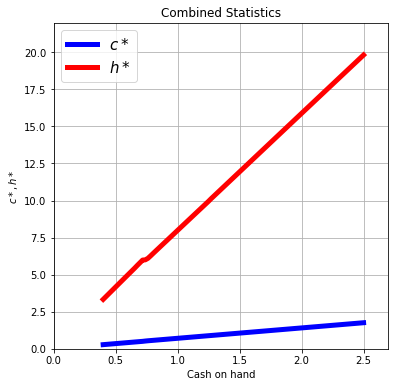

In [3]:
import numpy as np
import matplotlib.pyplot as plt # baseline modul

#Data containers
c_star = []
h_star = []
x_axis = []
# loop 100 values between 0.4 and 2.5, 2.5 included
for m in np.linspace(0.4,2.5,num=100,endpoint=True):

#  solving the function
    
    sol_case = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict,m),
    method='SLSQP',constraints=constraints)

    c = sol_case.x[0]
    h = sol_case.x[1]


    #appending the results to the data containers 
    c_star.append(c)
    h_star.append(h)
    x_axis.append(m)
    
    
#initialising the figuere

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

#adding title
plt.title("Combined Statistics")

#plotting c and h values as lines
ax.plot(x_axis, c_star, color='blue', label="$c*$", linewidth=5)
ax.plot(x_axis, h_star, color='red', label="$h*$", linewidth=5)

# adding legend
plt.legend(loc='best', fontsize=15)

# adding labels 
ax.set_xlabel('Cash on hand')
ax.set_ylabel('$c*, h*$')

# costumizing end and begining of x and y axis.
ax.set_xlim([0,2.7])
ax.set_ylim([0,22])
ax.grid(True)  


# Question 3

ADD ANSWER.

In [4]:
#do we use epsilon in this regime????


N = 10000
seed =1 
np.random.seed(seed)
#m = np.random.lognormal(mean=-0.4, sigma=0.35, size=N)


def tax_func(h, param_dict):
    """ tax function """
    
    return param_dict['tau_g']*h + param_dict['tau_p']*max(h-param_dict['p_bar'],0)







individual_i = []

for m in np.random.lognormal(mean=-0.4, sigma=0.35, size=N):
    

    sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict,m),
    method='SLSQP',constraints=constraints)

    c2 = sol_case2.x[0]
    h2= sol_case2.x[1]


    tax = tax_func(h2, param_dict)
    individual_i.append(tax)

rev= sum(individual_i)   
print(rev)
avg_tax=rev/N
print(avg_tax)

812.749128210178
0.0812749128210178


# Question 4

ADD ANSWER.

In [5]:
param_dict2 = {'phi'  : 0.3,
              'eps'  : 0.8,
              'r'    : 0.03,
              'tau_g': 0.01,
              'tau_p': 0.009,
              'p_bar': 8,
             }
N = 10000
seed =1 
np.random.seed(seed)
#m = np.random.lognormal(mean=-0.4, sigma=0.35, size=N)
def tax_func(h, param_dict2):
    """ tax function """
    
    return param_dict2['tau_g']*h + param_dict2['tau_p']*max(h-param_dict2['p_bar'],0)




constraints2 = ({'type': 'ineq', 'fun': lambda x:  m- (x[0] + param_dict2['r']*x[1] 
                                                      + param_dict2['tau_g']*x[1]*param_dict2['eps']
                                                      + param_dict2['tau_p']*max(x[1]*param_dict2['eps']
                                                                                -param_dict2['p_bar'],0))})
individual_i2 = []

for m in np.random.lognormal(mean=-0.4, sigma=0.35, size=N):
    

    sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict2,m),
    method='SLSQP',constraints=constraints2)

    c3 = sol_case3.x[0]
    h3= sol_case3.x[1]
    #print(c3)


    tax2 = tax_func(h3, param_dict2)
    individual_i2.append(tax2)

rev2= sum(individual_i2)   
print(rev2)
avg_tax2=rev2/N
print(avg_tax2)

575.5368478601471
0.057553684786014705


# Question 5

ADD ANSWER.

In [46]:
N = 100
tau_g_vec = np.linspace(0,0.05,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
tau_g_best = np.nan # revenue from Q3

rev_li =[]
tau_g_li =[]

for i,tau_g in enumerate(tau_g_vec):

    constraints2 = ({'type': 'ineq', 'fun': lambda x:  m- (x[0] + param_dict2['r']*x[1] 
                                                      + tau_g *x[1]*param_dict2['eps']
                                                      + param_dict2['tau_p']*max(x[1]*param_dict2['eps']
                                                                                -param_dict2['p_bar'],0))})
    
    
    individual = []

    for m in np.random.lognormal(mean=-0.4, sigma=0.35, size=100):
    

        sol = optimize.minimize(
        value_of_choice,initial_guess,args=(param_dict2,m),
        method='SLSQP',constraints=constraints2)

        c_ = sol.x[0]
        h_ = sol.x[1]


        taxx = tau_g *h_ + param_dict2['tau_p']*max(h_-param_dict2['p_bar'],0)
        individual.append(taxx)
    r_ =sum(individual)
    r = r_/100
    tau_g_li.append(tau_g)
    rev_li.append(abs(avg_tax-r))

together = list(zip(tau_g_li, rev_li))
c = list(zip(tau_g_li, rev_li))
optimal_tau_g = min(c, key = lambda t: t[1])
print(optimal_tau_g)

(0.01616161616161616, 0.0002068987076586093)


In [48]:
param_dict3= {'phi'  : 0.3,
              'eps'  : 0.8,
              'r'    : 0.03,
              'tau_g': 0.01616161616161616,
              'tau_p': 0.009,
              'p_bar': 8,
             }
N = 10000
seed =1 
np.random.seed(seed)
#m = np.random.lognormal(mean=-0.4, sigma=0.35, size=N)
def tax_func(h, param_dict3):
    """ tax function """
    
    return param_dict3['tau_g']*h + param_dict3['tau_p']*max(h-param_dict3['p_bar'],0)




constraints2 = ({'type': 'ineq', 'fun': lambda x:  m- (x[0] + param_dict3['r']*x[1] 
                                                      + param_dict3['tau_g']*x[1]*param_dict3['eps']
                                                      + param_dict3['tau_p']*max(x[1]*param_dict3['eps']
                                                                                -param_dict3['p_bar'],0))})
individual_i2 = []

for m in np.random.lognormal(mean=-0.4, sigma=0.35, size=N):
    

    sol_case_test = optimize.minimize(
    value_of_choice,initial_guess,args=(param_dict3,m),
    method='SLSQP',constraints=constraints2)

    c_test = sol_case_test.x[0]
    h_test= sol_case_test.x[1]
    #print(c3)


    taks = tax_func(h_test, param_dict3)
    individual_i2.append(taks)

rev2= sum(individual_i2)   
print(rev2)
avg_tax2=rev2/N
print(avg_tax2)


812.4799277398922
0.08124799277398922


# Conclusion

ADD CONCISE CONLUSION.